In [1]:
import json
import pandas as pd
import copy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
Mexican_shop=pd.read_csv("mexican.csv")

C:\Users\zyjxx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (35,36,38,39,40,42,45,47,48,50,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Las Vegas     111405
Phoenix        75556
Scottsdale     28268
Toronto        18186
Charlotte      17692
Mesa           13993
Henderson      13540
Pittsburgh     11873
Tempe          11830
Chandler       11746
Name: city, dtype: int64

In [10]:
Mexican_shop.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month
0,0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,...,QNmY376TXxnanuVVOd6jTQ,Hw8mxfICqErjwIVsC5rXUw,3.0,0,0,0,"I mean it's Taco Bell, so it is what it is. Ho...",2018-09-26 03:26:43,2018,9
1,1,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,...,q0uAJsHS8tU9Lxjp8HkH6w,qfA3pCsmjRdKl3CYVZ4p7w,1.0,0,1,0,"1 star for service, but the food is not ok :( ...",2012-03-06 14:06:35,2012,3
2,2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,...,s-1UrmPhWuMtTQk-bearcg,ZQsculZs_WMVFnBGQee1EQ,4.0,1,0,0,Taco Bell has really improved over the years a...,2013-03-22 06:17:38,2013,3
3,3,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,...,LlZoEaNMmm5V6p_isMr_4g,8YHYABG7zc1s42OAMHAa6Q,5.0,1,1,1,This is one of the most exquisite Taco Belles ...,2017-08-11 03:00:35,2017,8
4,4,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,...,Xwr-yKAtZK04JaW7wTT-jA,8ZPOQA5k0mfC8H-aJpRHOw,4.0,0,1,0,What can you say about Taco Bell other than fr...,2011-03-31 21:20:25,2011,3


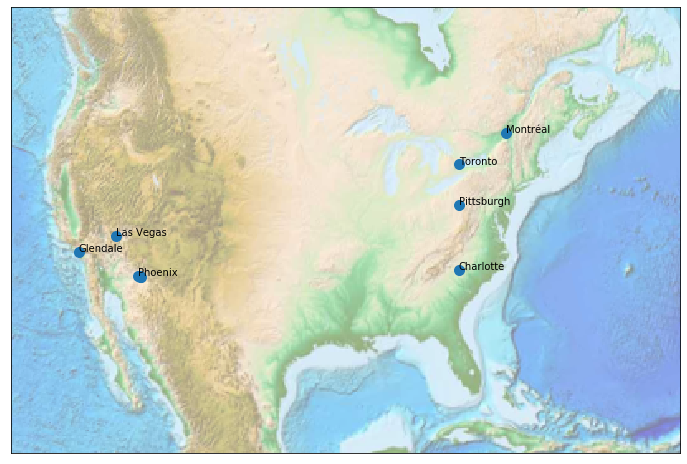

In [99]:
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='lcc', resolution=None,
width=6E6, height=4E6,
lat_0=39, lon_0=-92,)
m.etopo(scale=0.5, alpha=0.5)

lon=[-115.139832,-79.383186,-112.074036,-80.843124,-73.567253,-79.995888,-118.255074,-111.926048,-111.831474,-111.941254]
lat=[36.169941,43.653225,33.448376,35.227085,45.501690,40.440624,34.142509,33.494171,33.415184,33.425522]
city=['Las Vegas','Toronto','Phoenix','Charlotte','Montréal','Pittsburgh','Glendale']
lon,lat=m(lon,lat)
m.scatter(lon, lat, s=100)
for i in range(0,7):
    plt.text(lon[i], lat[i],city[i], fontsize=10)
plt.savefig('location.png',dpi=300)




In [100]:
Canada=Mexican_shop[(Mexican_shop['city']=='Toronto') | (Mexican_shop['city']=='Montréal')]
US=Mexican_shop[(Mexican_shop['city']=='Las Vegas') | (Mexican_shop['city']=='Phoenix') | (Mexican_shop['city']=='Charlotte') | (Mexican_shop['city']=='Pittsburgh')
               | (Mexican_shop['city']=='Glendale') | (Mexican_shop['city']=='Mesa') | (Mexican_shop['city']=='Tempe') | (Mexican_shop['city']=='Scottsdale')]

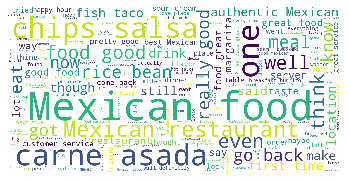

In [110]:
text=Mexican_review['text'].values
text_1 = "".join(str(e) for e in text)
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, random_state=30, scale=3)
wordcloud.generate_from_text(text_1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [111]:
def distribution(words, texts, rating):
    data=[]
    stars_category=[1.0,2.0,3.0,4.0,5.0]
    for i in words:
        index=0
        stars=[]
        for j in texts:
            if i in j :
                stars.append(rating[index])
            index += 1
        data.append(stars)
    for k in range(len(words)):
        counts=[]
        for l in stars_category:
            counts.append(data[k].count(l))
        plt.bar(range(len(counts)), counts , color=['r','g','b', 'c', 'm'],tick_label=stars_category)
        plt.suptitle(words[k],fontsize=30)
        plt.xlabel("stars",fontsize=15)
        plt.ylabel("frequency",fontsize=15)
        plt.show()
                
            
    

In [13]:
sw=set(["food","restaurant","Mexican","one","good","know","eat"])

In [15]:
STOPWORDS = STOPWORDS | sw